In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings(action="ignore")

Loading the Dataset.

In [2]:
df = pd.read_excel(r'C:\Users\Dell\Downloads\telcom_data.xlsx')

In [3]:
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Check the dimension of the dataset.

In [4]:
df.shape

(150001, 55)

In [5]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

Get The Brief Imformation of Dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

1. User Overiew Analysis

Sub-task 1: Identify the top 10 handsets used by the customers


In [7]:
top_10_handsets = df['Handset Type'].value_counts(ascending = False).head(10)
top_10_handsets = pd.DataFrame(top_10_handsets)
top_10_handsets

,count
Handset Type,
Huawei B528S-23A,19752
Apple iPhone 6S (A1688),9419
Apple iPhone 6 (A1586),9023
undefined,8987
Apple iPhone 7 (A1778),6326
Apple iPhone Se (A1723),5187
Apple iPhone 8 (A1905),4993
Apple iPhone Xr (A2105),4568
Samsung Galaxy S8 (Sm-G950F),4520


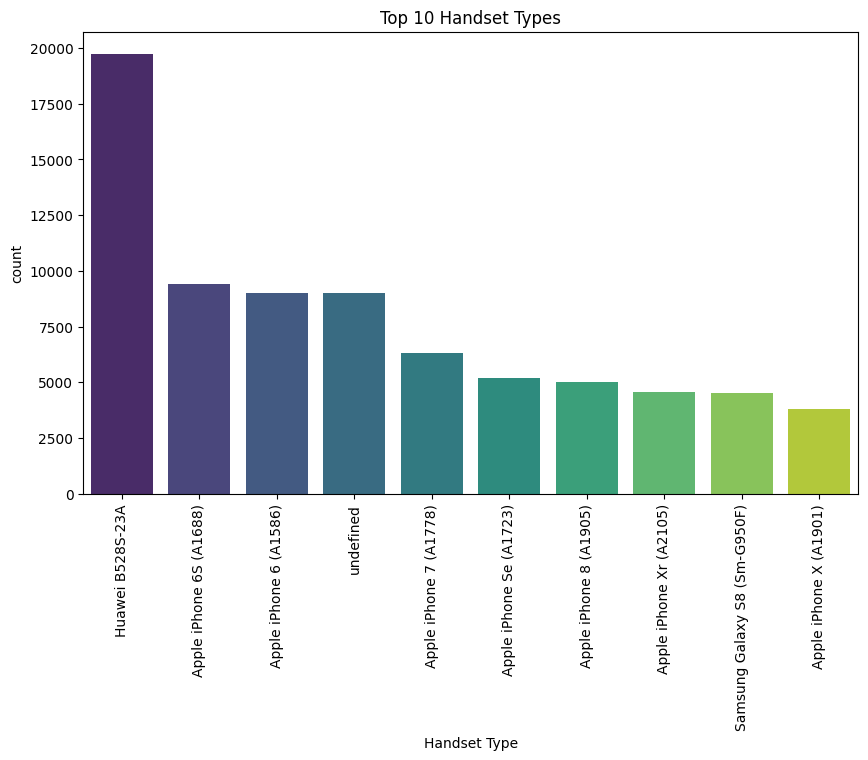

In [8]:
# Create a barplot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=top_10_handsets.index, y='count', data=top_10_handsets, palette='viridis')

# Customize the plot
plt.title('Top 10 Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('count')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

Sub-task 2: Identify the top 3 handset manufacturers

In [9]:
top_3_handsets_Manufacturers = df['Handset Manufacturer'].value_counts(ascending = False).head(3)
top_3_handsets_Manufacturers = pd.DataFrame(top_3_handsets_Manufacturers)
top_3_handsets_Manufacturers

,count
Handset Manufacturer,
Apple,59565
Samsung,40839
Huawei,34423


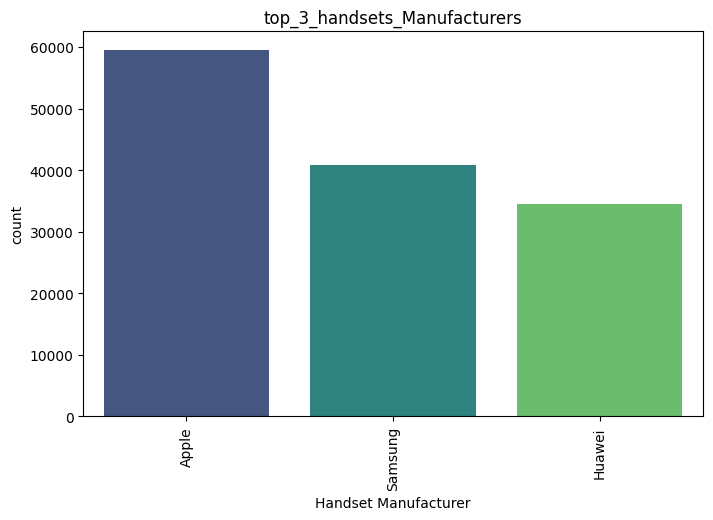

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x= top_3_handsets_Manufacturers.index, y = 'count',data=top_3_handsets_Manufacturers, palette='viridis')
# Customize the plot
plt.title('top_3_handsets_Manufacturers')
plt.xlabel('Handset Manufacturer')
plt.ylabel('count')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

Sub-task 3: Identify the top 5 handsets per top 3 handset manufacturers

In [11]:
for manufacturer in top_3_handsets_Manufacturers.index:
    top_5_handsets_per_manufacturer = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    
    print(f"Top 5 Handsets for {manufacturer}:")
    print(top_5_handsets_per_manufacturer)
    print("\n")

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64




Sub-task 4: Make a short interpretation and recommendation to marketing teams

In [12]:
interpretation = """
Interpretation:
1. The top 10 handsets used by customers have been identified, indicating the most popular devices.
2. The top 3 handset manufacturers are determined, providing insights into market dominance.
3. The top 5 handsets per top 3 manufacturers offer a detailed view of popular devices from key manufacturers.

Recommendation to Marketing Teams:
Based on the analysis, marketing teams can focus on promoting and optimizing services for the top handsets and manufacturers.
Consider partnerships or special promotions with the top manufacturers to leverage their market presence.
Tailor advertising strategies for popular applications identified in xDR data sessions, such as Social Media, Google, Email, YouTube, Netflix, Gaming, and Others.
"""

print("Interpretation and Recommendation:")
print(interpretation)

Interpretation and Recommendation:

Interpretation:
1. The top 10 handsets used by customers have been identified, indicating the most popular devices.
2. The top 3 handset manufacturers are determined, providing insights into market dominance.
3. The top 5 handsets per top 3 manufacturers offer a detailed view of popular devices from key manufacturers.

Recommendation to Marketing Teams:
Based on the analysis, marketing teams can focus on promoting and optimizing services for the top handsets and manufacturers.
Consider partnerships or special promotions with the top manufacturers to leverage their market presence.
Tailor advertising strategies for popular applications identified in xDR data sessions, such as Social Media, Google, Email, YouTube, Netflix, Gaming, and Others.



Task 1.1 - Your employer wants to have an overview of the users’ behavior on those
applications.

● Aggregate per user the following information in the column

In [13]:
def aggregate_per_user(df):

    columns_to_show = ['Dur. (ms)', 'Total UL (Bytes)', 
                   'Total DL (Bytes)', ]

    return df.groupby(['Bearer Id'])[columns_to_show].agg([np.mean, np.min, 
                                            np.max,])

aggregate_per_user(df)

Dur. (ms)                     Total UL (Bytes)  \
                               mean       min       max             mean   
Bearer Id                                                                  
6917537518543529984    24534.000000   24534.0   24534.0     4.170461e+07   
6917537604825860096    21489.000000   21489.0   21489.0     3.869360e+07   
6917537608536819712    27786.000000   27786.0   27786.0     1.554893e+07   
6917537633966310400    15635.000000   15635.0   15635.0     4.960569e+07   
6917537638622189568    24264.000000   24264.0   24264.0     2.198346e+07   
...                             ...       ...       ...              ...   
13186541164985800704  145291.000000  145291.0  145291.0     3.618959e+07   
13186541166737199104   86399.000000   86399.0   86399.0     3.591946e+07   
13186541166776899584   86399.000000   86399.0   86399.0     4.087768e+07   
13186541167134199808  103113.000000  103113.0  103113.0     4.614756e+07   
                       50779.983838    7212.0  470053.0     4.094127e+07   

                                             Total DL (Bytes)               \
                             min         max             mean          min   
Bearer Id                                                                    
6917537518543529984   41704610.0  41704610.0     5.007220e+08  500721999.0   
6917537604825860096   38693596.0  38693596.0     7.095493e+08  709549265.0   
6917537608536819712   15548926.0  15548926.0     8.544659e+08  854465860.0   
6917537633966310400   49605688.0  49605688.0     8.257865e+08  825786510.0   
6917537638622189568   21983463.0  21983463.0     6.249578e+08  624957763.0   
...                          ...         ...              ...          ...   
13186541164985800704  36189587.0  36189587.0     3.870016e+08  387001634.0   
13186541166737199104  35919460.0  35919460.0     8.726888e+08  872688792.0   
13186541166776899584  40877676.0  40877676.0     3.863551e+08  386355068.0   
13186541167134199808  46147558.0  46147558.0     3.272128e+08  327212841.0   
                       7732426.0  70590714.0     4.477787e+08   25592436.0   

                                   
                              max  
Bearer Id                          
6917537518543529984   500721999.0  
6917537604825860096   709549265.0  
6917537608536819712   854465860.0  
6917537633966310400   825786510.0  
6917537638622189568   624957763.0  
...                           ...  
13186541164985800704  387001634.0  
13186541166737199104  872688792.0  
13186541166776899584  386355068.0  
13186541167134199808  327212841.0  
                      883431445.0  

[134709 rows x 9 columns]

1. Number of xDR sessions

In [14]:
xdr_sess = df[['Bearer Id', 'MSISDN/Number']]
a = xdr_sess.groupby('MSISDN/Number').count()
a.columns = ['xdr sessions']
a.head()

,xdr sessions
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2


Text(0.5, 1.0, 'Users with highest session numbers')

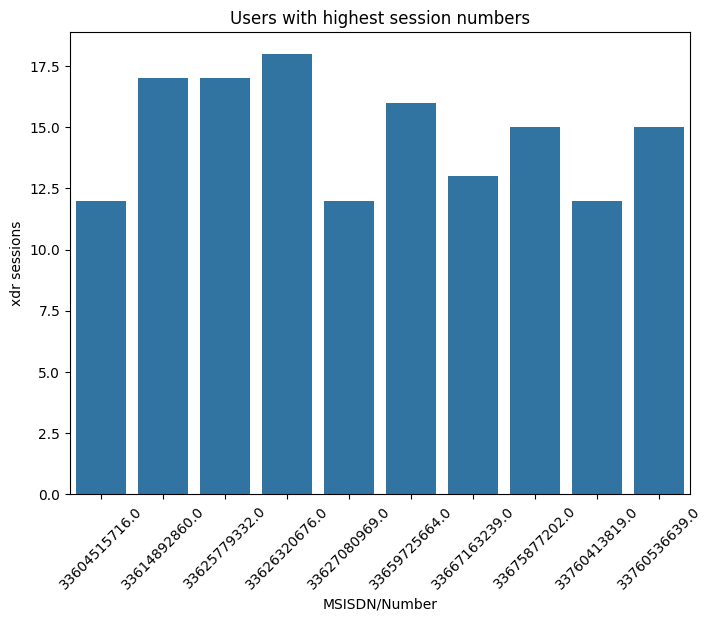

In [15]:
t = a.sort_values(by = 'xdr sessions', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['xdr sessions'])
plt.xticks(rotation = 45)
plt.title('Users with highest session numbers')

2. Session duration

In [16]:
Session_duration = df[['Dur. (ms)', 'MSISDN/Number']]
b = Session_duration.groupby('MSISDN/Number').sum()
b.columns = ['sess_duration (ms)']
b.head()

,sess_duration (ms)
MSISDN/Number,
3.360100e+10,116720.0
3.360100e+10,181230.0
3.360100e+10,134969.0
3.360101e+10,49878.0
3.360101e+10,37104.0


Text(0.5, 1.0, 'Users with longest session duration')

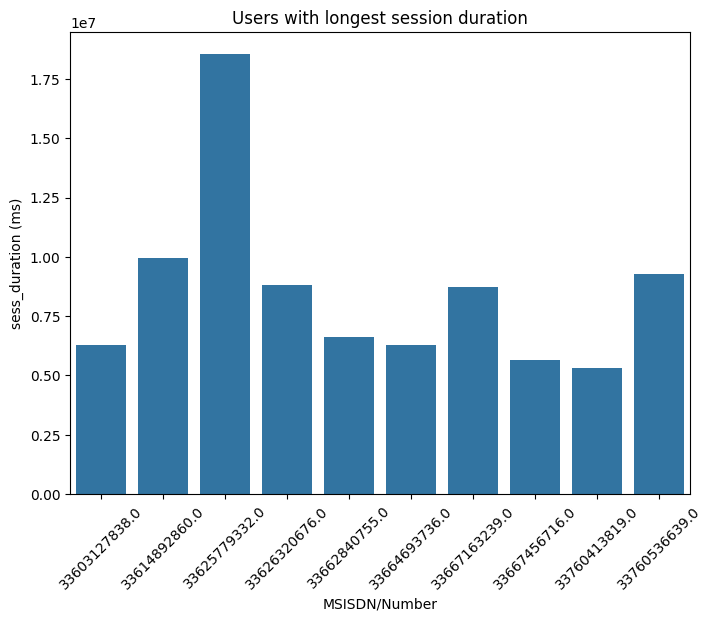

In [17]:
t = b.sort_values(by = 'sess_duration (ms)', ascending = False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x = t.index, y = t['sess_duration (ms)'])
plt.xticks(rotation = 45)
plt.title('Users with longest session duration')

3. The total download (DL) and upload (UL) data

In [18]:
byte = df[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
3.360100e+10,36053108.0,8.426375e+08
3.360100e+10,36104459.0,1.207552e+08
3.360100e+10,39306820.0,5.566597e+08
3.360101e+10,20327526.0,4.019932e+08
3.360101e+10,94280527.0,1.363130e+09


In [19]:
# Ensure the required columns are present
required_columns = ['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)']
if not all(column in df.columns for column in required_columns):
    print("Required columns are missing in the dataset.")
    # You may need to adjust the column names according to your dataset structure.
    # Also, make sure the columns are in numeric format.

# Calculate total bytes and group by 'MSISDN/Number'
df['Total_bytes'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
total_bytes_grouped = df.groupby('MSISDN/Number')['Total_bytes'].sum()

# Display the result
print(total_bytes_grouped.head())

MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
Name: Total_bytes, dtype: float64


In [20]:
# Ensure the 'Total DL (Bytes)' and 'Total UL (Bytes)' columns are present
required_columns = ['Total DL (Bytes)', 'Total UL (Bytes)']
if not all(column in df.columns for column in required_columns):
    print("Required columns are missing in the dataset.")
    # You may need to adjust the column names according to your dataset structure.
    # Also, make sure the columns are in numeric format.

# Calculate total download (DL) and upload (UL) data
total_dl = df['Total DL (Bytes)'].sum()
total_ul = df['Total UL (Bytes)'].sum()

print(f'Total Download Data: {total_dl} Bytes')
print(f'Total Upload Data: {total_ul} Bytes')

Total Download Data: 68196514511845.0 Bytes
Total Upload Data: 6168180943816.0 Bytes


In [21]:
# Assuming you have 'Total UL (Bytes)' and 'Total DL (Bytes)' columns
df['total_bytes'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Now you can use the column in your analysis
byte = df[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_bytes']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

,Total UL (Bytes),Total DL (Bytes),total_bytes
MSISDN/Number,,,
3.360100e+10,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,94280527.0,1.363130e+09,1.457411e+09


Text(0.5, 1.0, 'A sample of users upload, download and total bytes')

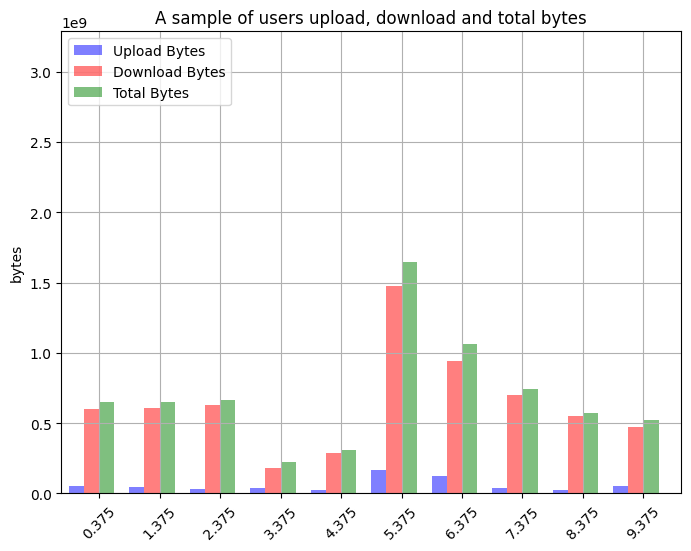

In [22]:
# plotting a sample of the data
t = c.sample(10)
pos = list(range(len(t['Total UL (Bytes)'])))
width = 0.25
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(pos, t['Total UL (Bytes)'], width, alpha=0.5, color='b')
plt.bar([p + width for p in pos], t['Total DL (Bytes)'], width, alpha=0.5, color='r')
plt.bar([p + width*2 for p in pos], t['total_bytes'], width, alpha=0.5, color='g')
ax.set_ylabel('bytes')
ax.set_title('Bytes data per user')
ax.set_xticks([p + 1.5 * width for p in pos])
plt.xticks(rotation = 45)

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(t['Total UL (Bytes)'] + t['Total DL (Bytes)'] + t['total_bytes'])] )
plt.legend(['Upload Bytes', 'Download Bytes', 'Total Bytes'], loc='upper left')
plt.grid()
plt.title('A sample of users upload, download and total bytes')

Note:-Upload bytes are less than download bytes throughout

4.The total data volume (in Bytes) during this session for each application

In [23]:
byte = df[['MSISDN/Number', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_bytes']]
c = byte.groupby('MSISDN/Number').sum()
c.head()

,Total UL (Bytes),Total DL (Bytes),total_bytes
MSISDN/Number,,,
3.360100e+10,36053108.0,8.426375e+08,8.786906e+08
3.360100e+10,36104459.0,1.207552e+08,1.568596e+08
3.360100e+10,39306820.0,5.566597e+08,5.959665e+08
3.360101e+10,20327526.0,4.019932e+08,4.223207e+08
3.360101e+10,94280527.0,1.363130e+09,1.457411e+09


Task 1.2 - Conduct exploratory data analysis on those data & communicate useful insights.
Ensure that you identify and treat all missing values and outliers in the dataset by replacing
them with the mean of the corresponding column.

Handling Missing Values

PreProcessing

Numerical, Categorical and TimeStamp features

In [24]:
numerical = []
categorical = []
timestamps = []

for col in df.columns:
    if df[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif df[col].dtype == object:
        categorical.append(col)
    else:
        timestamps.append(col)
        
        
features = numerical+categorical+timestamps
df1 = df[features]
df1.head(3)

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Total UL (Bytes),Total DL (Bytes),Total_bytes,total_bytes,Bearer Id,Last Location Name,Handset Manufacturer,Handset Type,Start,End
0,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,23.0,44.0,...,36749741.0,308879636.0,345629377.0,345629377.0,13114483460844900352,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F,2019-04-04 12:01:18,2019-04-25 14:35:31
1,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,16.0,26.0,...,53800391.0,653384965.0,707185356.0,707185356.0,13114483482878900224,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),2019-04-09 13:04:04,2019-04-25 08:15:48
2,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,NaN,NaN,6.0,9.0,...,27883638.0,279807335.0,307690973.0,307690973.0,13114483484080500736,D42335A,Samsung,Samsung Galaxy A8 (2018),2019-04-09 17:42:11,2019-04-25 11:58:13


In [25]:
df1.shape

(150001, 57)

In [26]:
df1.isna().sum()

Start ms                                         1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

Numerical Columns

In [27]:
#Null numerical values (percentage)
null = df1[numerical].isna().sum().sort_values(ascending = False)
null_per = (null/150001) * 100
null_perc = pd.DataFrame(null_per)
null_perc

,0
Nb of sec with 37500B < Vol UL,86.835421
Nb of sec with 6250B < Vol UL < 37500B,74.561503
Nb of sec with 125000B < Vol DL,65.024900
TCP UL Retrans. Vol (Bytes),64.432237
Nb of sec with 31250B < Vol DL < 125000B,62.390251
Nb of sec with 1250B < Vol UL < 6250B,61.928920
Nb of sec with 6250B < Vol DL < 31250B,58.877607
TCP DL Retrans. Vol (Bytes),58.763608
HTTP UL (Bytes),54.539636
HTTP DL (Bytes),54.315638


Note:Some columns have big percentages of missing values. For the meantime, imputation with column means will be done incase the columns come in handy. Otherwise, they'll be dropped. The big_data list below will store the names of cols with missing values > 50%

In [28]:
# columns with >50% null values
bad_data = []
for entry, column in zip(null_perc.iloc[:, 0], null_perc.index):
    if entry >= 50:
        bad_data.append(column)
        
# bad_data

In [29]:
bad_data

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

Note: This is bad data 50% more then missing value .

All the numerical columns with missing values will be imputed with the mean of the column given the absence of nominal columns.

In [30]:
# get the numerical null values indices from the dataframe
a = null_perc.index.to_list()
# col_index = pd.DataFrame(raw.columns, columns = ['name'])
indices = []
for col in a:
    k = df1.columns.get_loc(col)
    indices.append(k)
# col_index
len(indices)

51

In [31]:
# MSISDN/Number is more of a categorical column than numurical given its a unique id for each user.
# imputing it with mean would result to the creation of non-existence users. Like other categorical variables with nan, it'll be imputed with mode
df1.columns.get_loc('MSISDN/Number')

4

In [32]:
#imputing with column means.
columns = indices
for col in columns:
    x = df1.iloc[:, col].values
    x = x.reshape(-1,1)
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    df1.iloc[:, col] = x #indices.remove(h)

In [33]:
x

array([[ 2501332.    ],
       [19111729.    ],
       [14699576.    ],
       ...,
       [ 1855903.    ],
       [ 8305402.    ],
       [11009410.1347]])

In [34]:
df1[numerical].isna().any()

Start ms                                    False
End ms                                      False
Dur. (ms)                                   False
IMSI                                        False
MSISDN/Number                               False
IMEI                                        False
Avg RTT DL (ms)                             False
Avg RTT UL (ms)                             False
Avg Bearer TP DL (kbps)                     False
Avg Bearer TP UL (kbps)                     False
TCP DL Retrans. Vol (Bytes)                 False
TCP UL Retrans. Vol (Bytes)                 False
DL TP < 50 Kbps (%)                         False
50 Kbps < DL TP < 250 Kbps (%)              False
250 Kbps < DL TP < 1 Mbps (%)               False
DL TP > 1 Mbps (%)                          False
UL TP < 10 Kbps (%)                         False
10 Kbps < UL TP < 50 Kbps (%)               False
50 Kbps < UL TP < 300 Kbps (%)              False
UL TP > 300 Kbps (%)                        False


Categorical and Timestamp columns

In [35]:
#Null categorical and timestamps values 
null = df1[categorical + timestamps].isna().sum().sort_values(ascending = False)
null = (null/150001) * 100
null = pd.DataFrame(null)
null

,0
Last Location Name,0.768662
Handset Manufacturer,0.381331
Handset Type,0.381331
Start,0.000667
End,0.000667
Bearer Id,0.000000


Note:The null values in these columns contribute a small percentage to the column values, thus not a big deal. Imputation will be done using the mode/most_frequent value. But first, they have to be converted to type str.

In [36]:
for col in categorical+timestamps:
    df1[col] = df1[col].astype(str)

In [37]:
# get the numerical null values indices from the dataframe
a = null.index.to_list()
# col_index = pd.DataFrame(raw.columns, columns = ['name'])
indices = []
for col in a:
    k = df1.columns.get_loc(col)
    indices.append(k)
    
indices

[52, 53, 54, 55, 56, 51]

In [38]:
# imputing with mode
indices.append(4) #the user id col
columns = indices
for col in columns:
    x = df1.iloc[:, col].values
    x = x.reshape(-1,1)
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer = imputer.fit(x)
    x = imputer.transform(x)
    df1.iloc[:, col] = x   

In [39]:
x

array([[3.36649622e+10],
       [3.36818544e+10],
       [3.37606271e+10],
       ...,
       [3.36218901e+10],
       [3.36196221e+10],
       [4.18828195e+10]])

In [40]:
df1[categorical+timestamps].isna().any()

Bearer Id               False
Last Location Name      False
Handset Manufacturer    False
Handset Type            False
Start                   False
End                     False
dtype: bool

In [41]:
df1.head()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Total UL (Bytes),Total DL (Bytes),Total_bytes,total_bytes,Bearer Id,Last Location Name,Handset Manufacturer,Handset Type,Start,End
0,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.0,44.0,...,36749741.0,308879636.0,345629377.0,345629377.0,13114483460844900352,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F,2019-04-04 12:01:18,2019-04-25 14:35:31
1,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.0,26.0,...,53800391.0,653384965.0,707185356.0,707185356.0,13114483482878900224,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),2019-04-09 13:04:04,2019-04-25 08:15:48
2,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,109.795706,17.662883,6.0,9.0,...,27883638.0,279807335.0,307690973.0,307690973.0,13114483484080500736,D42335A,Samsung,Samsung Galaxy A8 (2018),2019-04-09 17:42:11,2019-04-25 11:58:13
3,486.0,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,109.795706,17.662883,44.0,44.0,...,43324218.0,846028530.0,889352748.0,889352748.0,13114483485442799616,T21824A,undefined,undefined,2019-04-10 00:31:25,2019-04-25 07:36:35
4,565.0,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,109.795706,17.662883,6.0,9.0,...,38542814.0,569138589.0,607681403.0,607681403.0,13114483499480700928,D88865A,Samsung,Samsung Sm-G390F,2019-04-12 20:10:23,2019-04-25 10:40:32


In [42]:
df1.to_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_5\\clean_data.csv')

In [43]:
df1.shape

(150001, 57)

In [44]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149996    False
149997    False
149998    False
149999    False
150000    False
Length: 150001, dtype: bool

In [45]:
df1.isnull().sum()

Start ms                                    0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                             0
HTTP UL (Bytes)                   

Note:-All null values taken care of.

Timestamps to Pandas Datetime object

For imputation to work, their data type had to be change to string. That has to be reversed.

In [46]:
df1['Start'] = pd.to_datetime(df1['Start'])
df1['End'] = pd.to_datetime(df1['End'])

Feature Generation

In [47]:
df1['total_bytes'] =  df1['Total UL (Bytes)'] + df1['Total DL (Bytes)']
df1['social_media'] = df1['Social Media DL (Bytes)'] + df1['Social Media UL (Bytes)']
df1['email'] = df1['Email DL (Bytes)'] + df1['Email UL (Bytes)']
df1['google'] = df1['Google DL (Bytes)'] + df1['Google UL (Bytes)']
df1['youtube'] = df1['Youtube DL (Bytes)'] + df1['Youtube UL (Bytes)']
df1['netflix'] = df1['Netflix UL (Bytes)'] + df1['Netflix DL (Bytes)']
df1['gaming'] = df1['Gaming DL (Bytes)'] + df1['Gaming UL (Bytes)']
df1['other'] = df1['Other DL (Bytes)'] + df1['Other UL (Bytes)']
df1['total_tp'] = df1['Avg Bearer TP DL (kbps)'] + df1['Avg Bearer TP UL (kbps)']
df1['total_rtt'] = df1['Avg RTT DL (ms)'] + df1['Avg RTT UL (ms)']
df1['total_tcp'] = df1['TCP DL Retrans. Vol (Bytes)'] + df1['TCP UL Retrans. Vol (Bytes)']

Non-Graphical Univariate Analysis

Variables of interest: Number of xDR sessions, Session duration, the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).

Dispersion and Central Tendency

In [48]:
df1.head(3)

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,social_media,email,google,youtube,netflix,gaming,other,total_tp,total_rtt,total_tcp
0,770.0,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.0,44.0,...,1570185.0,3701304.0,2905912.0,18355943.0,17855187.0,292426453.0,180558843.0,67.0,47.000000,2.156957e+07
1,235.0,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.0,26.0,...,1933278.0,937385.0,4414096.0,39359124.0,35565545.0,609920783.0,541959383.0,42.0,70.000000,2.156957e+07
2,1.0,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,109.795706,17.662883,6.0,9.0,...,1726277.0,3363124.0,10229119.0,34425237.0,23751202.0,229980251.0,414908351.0,15.0,127.458589,2.156957e+07


In [49]:
df1.columns

Index(['Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (

In [50]:
df1.to_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_5\\finel_data.csv')

In [51]:
df1.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,social_media,email,google,youtube,netflix,gaming,other,total_tp,total_rtt,total_tcp
count,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,1.500010e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.828250e+06,2.259102e+06,7.807295e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08,15070.474573,127.458589,2.156957e+07
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,1.563000e+03,8.359000e+03,4.033000e+04,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,0.000000,0.000000,8.600000e+01
25%,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,47.000000,...,9.322180e+05,1.359344e+06,4.943599e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08,90.000000,40.000000,1.492449e+06
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,63.000000,...,1.826471e+06,2.263567e+06,7.812835e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08,125.000000,67.000000,2.156957e+07
75%,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,1120.000000,...,2.727487e+06,3.159818e+06,1.068280e+07,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08,22348.000000,127.458589,2.156957e+07
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,3.650861e+06,4.518036e+06,1.552878e+07,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,382262.000000,96924.000000,4.344116e+09
std,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,4625.340082,...,1.035646e+06,1.071109e+06,3.516420e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08,26825.755093,565.144762,1.184392e+08


Dispersion and Central Tendency

In [52]:
variables = df1[['Bearer Id', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)', 'social_media', 'netflix',
                  'gaming', 'youtube', 'google', 'email', 'other', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]
variables.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dur. (ms).1,150001.0,1.046091e+08,8.103734e+07,7142988.0,57442058.0,8.639998e+07,1.324307e+08,1.859336e+09
Total UL (Bytes),150001.0,4.112121e+07,1.127635e+07,2866892.0,33222029.0,4.114324e+07,4.903424e+07,7.833131e+07
Total DL (Bytes),150001.0,4.546434e+08,2.441421e+08,7114041.0,243107173.0,4.558409e+08,6.657051e+08,9.029696e+08
social_media,150001.0,1.828250e+06,1.035646e+06,1563.0,932218.0,1.826471e+06,2.727487e+06,3.650861e+06
netflix,150001.0,2.262861e+07,9.260820e+06,98432.0,15979455.0,2.263554e+07,2.929044e+07,4.519815e+07
gaming,150001.0,4.303331e+08,2.440199e+08,306358.0,218727939.0,4.316150e+08,6.414159e+08,8.592028e+08
youtube,150001.0,2.264348e+07,9.246800e+06,78903.0,15998463.0,2.266177e+07,2.929260e+07,4.519008e+07
google,150001.0,7.807295e+06,3.516420e+06,40330.0,4943599.0,7.812835e+06,1.068280e+07,1.552878e+07
email,150001.0,2.259102e+06,1.071109e+06,8359.0,1359344.0,2.263567e+06,3.159818e+06,4.518036e+06
other,150001.0,4.293653e+08,2.432681e+08,149045.0,218553417.0,4.299865e+08,6.399275e+08,8.595209e+08


In [53]:
df1['Bearer Id'].nunique()

134709

In [54]:
import pandas as pd

# Assuming 'variables' is your DataFrame
# If your DataFrame is named 'df1', replace 'variables' with 'df1'

# Convert non-numeric values to NaN
variables_numeric = variables.apply(pd.to_numeric, errors='coerce')

# Calculate skewness and kurtosis
s = variables_numeric.skew(axis=0, skipna=True)
k = variables_numeric.kurt(axis=0, skipna=True)

# Create a new DataFrame with skewness and kurtosis
result_df = pd.DataFrame({'Skewness': s, 'Kurtosis': k})

# Display the result DataFrame
print(result_df)

                               Skewness      Kurtosis
Bearer Id                      0.026666     -1.995157
Dur. (ms).1                    3.952622     37.022470
Total UL (Bytes)              -0.002456     -0.327436
Total DL (Bytes)              -0.003153     -1.198363
social_media                  -0.002121     -1.202178
netflix                       -0.000409     -0.608472
gaming                        -0.003225     -1.202256
youtube                       -0.005465     -0.604624
google                        -0.010602     -0.963035
email                         -0.006033     -1.061696
other                          0.001256     -1.196015
Avg RTT DL (ms)               69.705161   8805.687875
Avg RTT UL (ms)               31.530109   1632.646032
Avg Bearer TP DL (kbps)        2.589445      9.573691
Avg Bearer TP UL (kbps)        4.503428     25.086860
TCP DL Retrans. Vol (Bytes)   24.840677    697.574773
TCP UL Retrans. Vol (Bytes)  141.035684  21913.803296


Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

Approximately symmetric distribution: If the skewness value is between −½ and +½.

Really Flat distribution: Kurtosis less than -1. Peaked distribution: Kurtosis more than 1.

Summary of some of the variables:

 Outlier Detection

In [55]:
#IQR

#google
Q1 = np.percentile(df1.google, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.google, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.google, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.google, interpolation = 'midpoint') 
o = (df1.google < (Q1 - 1.5 * IQR)) |(df1.google > (Q3 + 1.5 * IQR))
i = o.unique()

#youtube
Q1 = np.percentile(df1.youtube, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.youtube, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.youtube, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.youtube, interpolation = 'midpoint') 
o = (df1.youtube < (Q1 - 1.5 * IQR)) |(df1.youtube > (Q3 + 1.5 * IQR))
j = o.unique()

#gaming
Q1 = np.percentile(df1.gaming, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.gaming, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.gaming, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.gaming, interpolation = 'midpoint') 
o = (df1.gaming < (Q1 - 1.5 * IQR)) |(df1.gaming > (Q3 + 1.5 * IQR))
k = o.unique()


#netflix
Q1 = np.percentile(df1.netflix, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.netflix, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.netflix, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.netflix, interpolation = 'midpoint') 
o = (df1.netflix < (Q1 - 1.5 * IQR)) |(df1.netflix > (Q3 + 1.5 * IQR))
l = o.unique()


#email
Q1 = np.percentile(df1.email, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.email, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.email, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.email, interpolation = 'midpoint') 
o = (df1.email < (Q1 - 1.5 * IQR)) |(df1.email > (Q3 + 1.5 * IQR))
m = np.unique(o)


#social_media
Q1 = np.percentile(df1.social_media, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.social_media, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.social_media, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.social_media, interpolation = 'midpoint') 
o = (df1.social_media < (Q1 - 1.5 * IQR)) |(df1.social_media > (Q3 + 1.5 * IQR))
n = o.unique()

#others
Q1 = np.percentile(df1.other, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.other, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.other, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.other, interpolation = 'midpoint') 
o = (df1.other < (Q1 - 1.5 * IQR)) |(df1.other > (Q3 + 1.5 * IQR))
p = o.unique()




['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
#Dur. (ms).1
Q1 = np.percentile(df1['Dur. (ms).1'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1['Dur. (ms).1'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1['Dur. (ms).1'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1['Dur. (ms).1'], interpolation = 'midpoint') 
o = (df1['Dur. (ms).1'] < (Q1 - 1.5 * IQR)) |(df1['Dur. (ms).1'] > (Q3 + 1.5 * IQR))
q = o.unique()

#total_bytes
Q1 = np.percentile(df1.total_bytes, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.total_bytes, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.total_bytes, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.total_bytes, interpolation = 'midpoint') 
o = (df1.total_bytes < (Q1 - 1.5 * IQR)) |(df1.total_bytes > (Q3 + 1.5 * IQR))
r = o.unique()

#total_tp
Q1 = np.percentile(df1.total_tp, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.total_tp, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.total_tp, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.total_tp, interpolation = 'midpoint') 
o = (df1.total_tp < (Q1 - 1.5 * IQR)) |(df1.total_tp > (Q3 + 1.5 * IQR))
s = o.unique()

#total_rtt
Q1 = np.percentile(df1.total_rtt, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.total_rtt, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.total_rtt, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.total_rtt, interpolation = 'midpoint') 
o = (df1.total_rtt < (Q1 - 1.5 * IQR)) |(df1.total_rtt > (Q3 + 1.5 * IQR))
t = o.unique()

#total_tcp
Q1 = np.percentile(df1.total_tcp, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df1.total_tcp, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df1.total_tcp, 75, interpolation = 'midpoint')  
IQR = stats.iqr(df1.total_tcp, interpolation = 'midpoint') 
o = (df1.total_tcp < (Q1 - 1.5 * IQR)) |(df1.total_tcp > (Q3 + 1.5 * IQR))
u = o.unique()


print('google', i)
print('youtube', j)
print('gaming', k)
print('netflix', l)
print('email', m)
print('social media', n)
print('other', p)
print('Duration', q)
print('total bytes', r)
print('total_tp', s)
print('total_rtt', t)
print('total_tcp', u)

google [False]
youtube [False]
gaming [False]
netflix [False]
email [False]
social media [False]
other [False]
Duration [ True False]
total bytes [False]
total_tp [False  True]
total_rtt [False  True]
total_tcp [False  True]


Graphical Univariate Analysis.

Variables of interest: Number of xDR sessions, Session duration, the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).

For graphical analysis of univariate categorical data, histograms are typically used. The histogram represents the frequency (count) or proportion (count/total count) of cases for a range of values. Typically, between about 5 and 30 bins are chosen. Histograms are one of the best ways to quickly learn a lot about your data, including central tendency, spread, modality, shape and outliers. Stem and Leaf plots could also be used for the same purpose. Boxplots can also be used to present information about the central tendency, symmetry and skew, as well as outliers. Quantile normal plots or QQ plots and other techniques could also be used here.

Number of xDR sessions, Session duration, the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).


 mu = 430333100.71 and sigma = 244019110.62



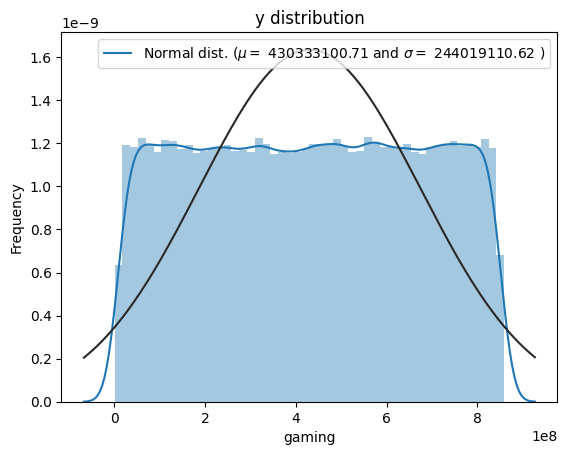

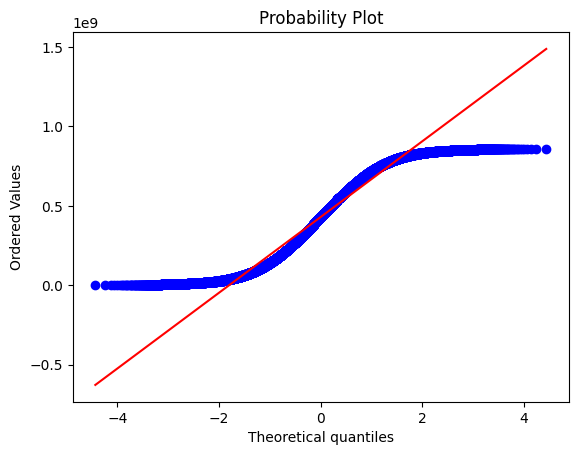

In [56]:
sns.distplot(df1['gaming'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['gaming'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['gaming'], plot=plt)
plt.show()


 mu = 22628606.54 and sigma = 9260789.22



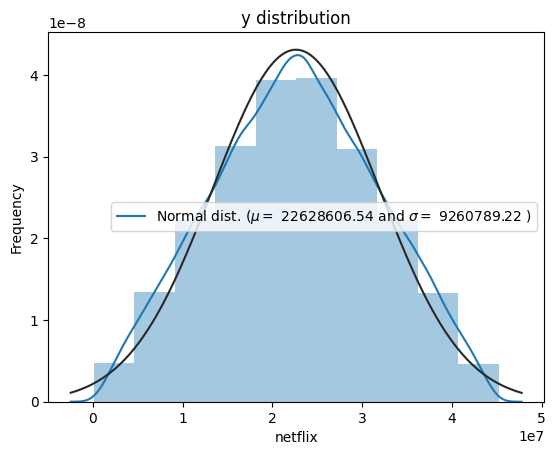

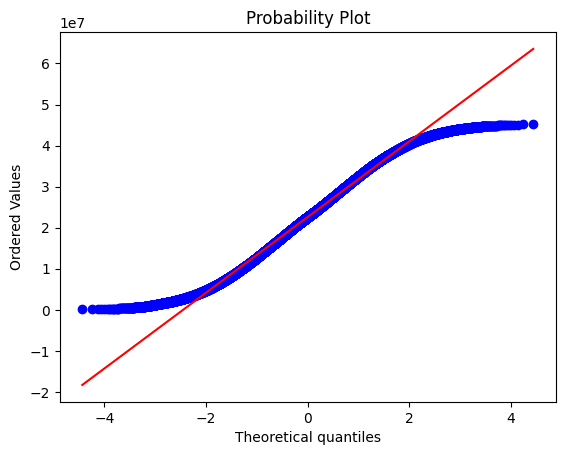

In [57]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
sns.distplot(df1['netflix'] , bins = 10, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['netflix'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['netflix'], plot=plt)
plt.show()


 mu = 22643482.64 and sigma = 9246769.48



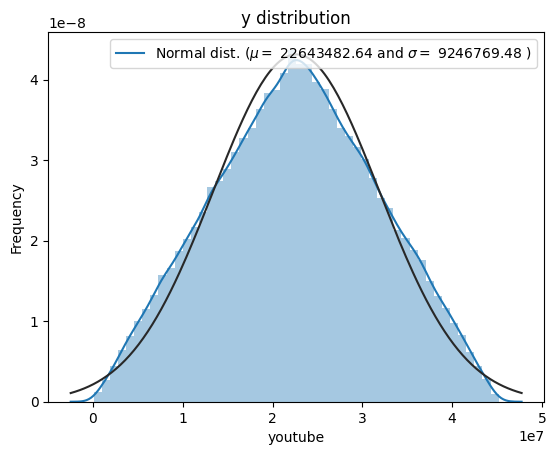

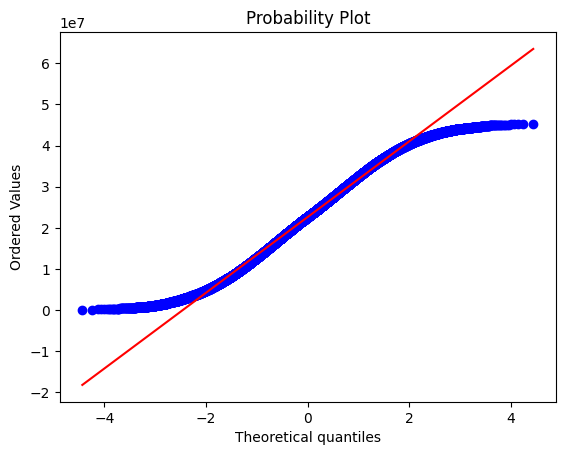

In [58]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
sns.distplot(df1['youtube'] , fit=norm);
# sns.violinplot(data['youtube'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['youtube'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['youtube'], plot=plt)
plt.show()


 mu = 2259102.31 and sigma = 1071105.49



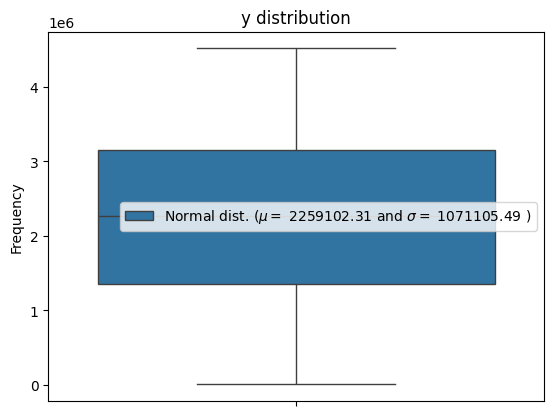

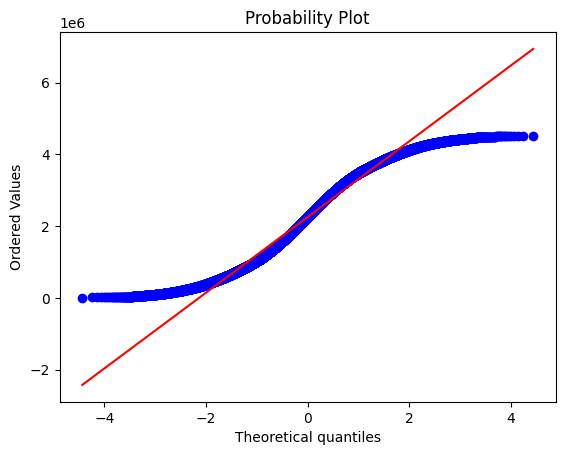

In [59]:
# sns.distplot(data['email'], fit = norm) # numeric
sns.boxplot(df1['email'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['email'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['email'], plot=plt)
plt.show()


 mu = 7807294.55 and sigma = 3516408.52



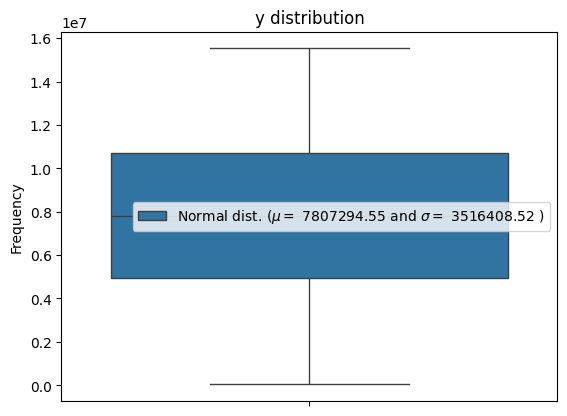

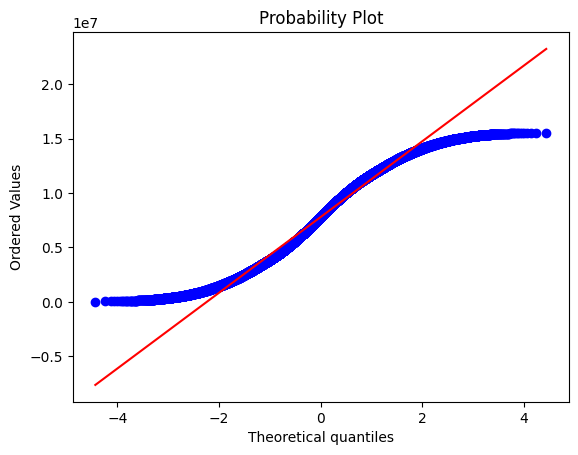

In [60]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
# sns.distplot(data['google'] , fit=norm);
sns.boxplot(df1['google'])

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['google'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['google'], plot=plt)
plt.show()


 mu = 1828250.21 and sigma = 1035642.69



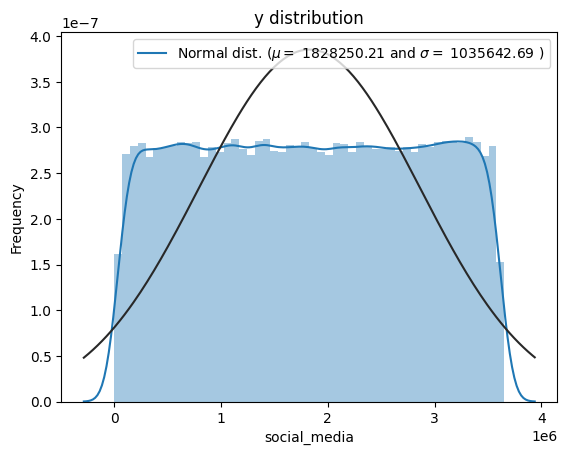

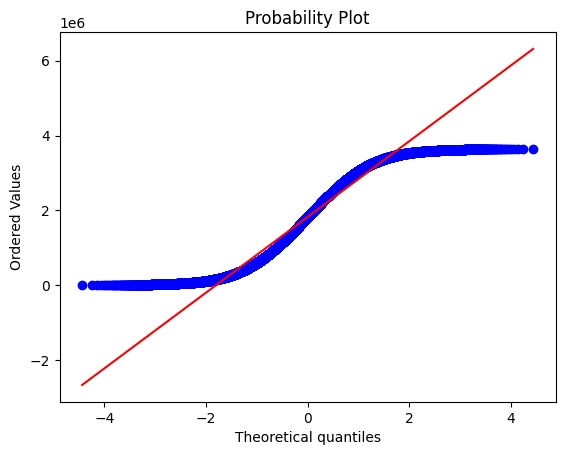

In [61]:
# sns.distplot(data['Social Media DL (Bytes)']) # numeric
sns.distplot(df1['social_media'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['social_media'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['social_media'], plot=plt)
plt.show()


 mu = 495764636.37 and sigma = 244380172.44



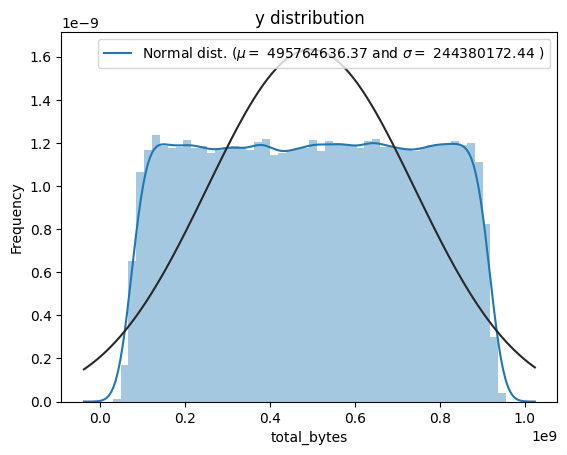

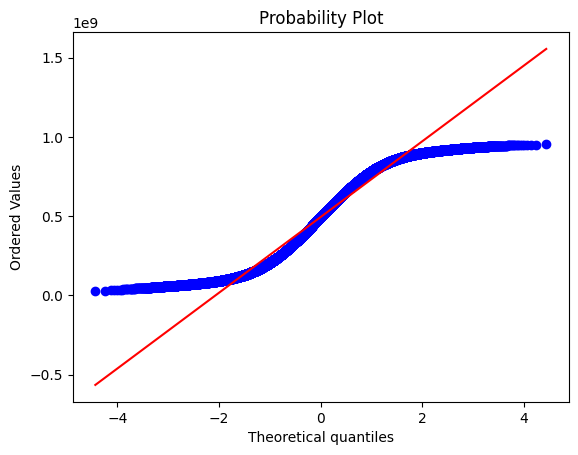

In [62]:
# total upload and download bytes
sns.distplot(df1['total_bytes'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['total_bytes'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['total_bytes'], plot=plt)
plt.show()

In [63]:
import scipy.stats as stats


 mu = 104609105.55 and sigma = 81037071.33



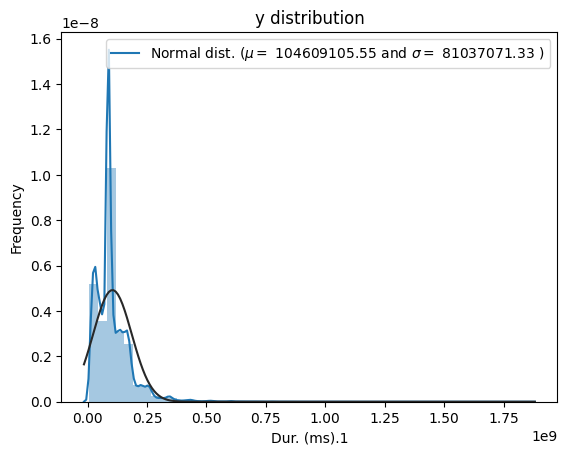

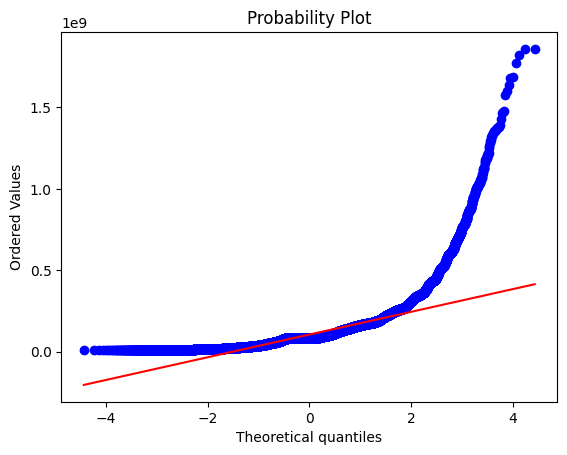

In [64]:
# xdr ms
sns.distplot(df1['Dur. (ms).1'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['Dur. (ms).1'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['Dur. (ms).1'], plot=plt)
plt.show()

This is Heavily rightly skewed.


 mu = 15070.47 and sigma = 26825.67



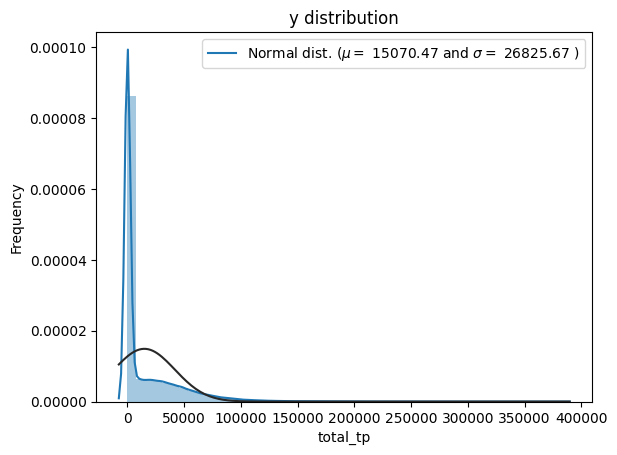

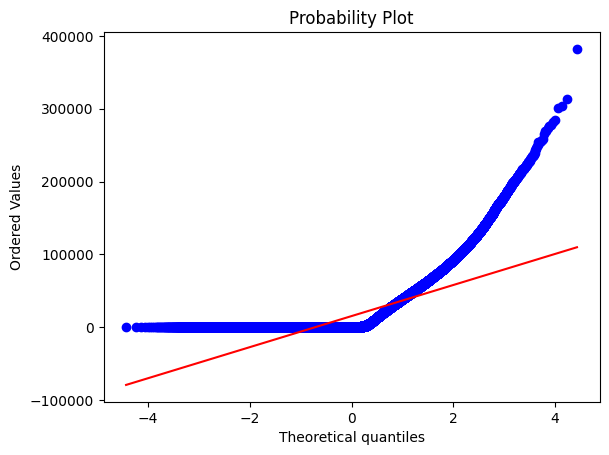

In [65]:
# total_tp
sns.distplot(df1['total_tp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['total_tp'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['total_tp'], plot=plt)
plt.show()

Note:-Heavily skewed to the right.


 mu = 127.46 and sigma = 565.14



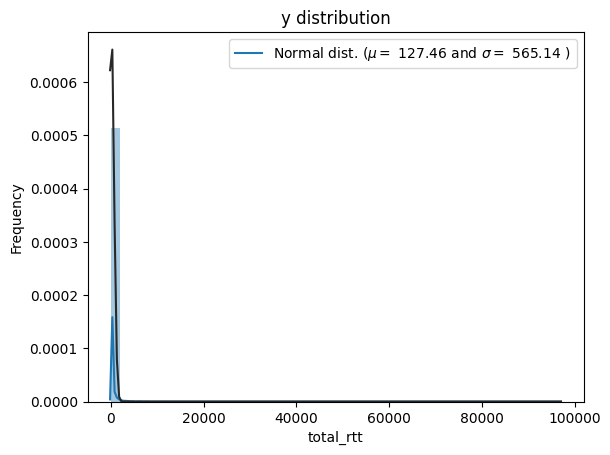

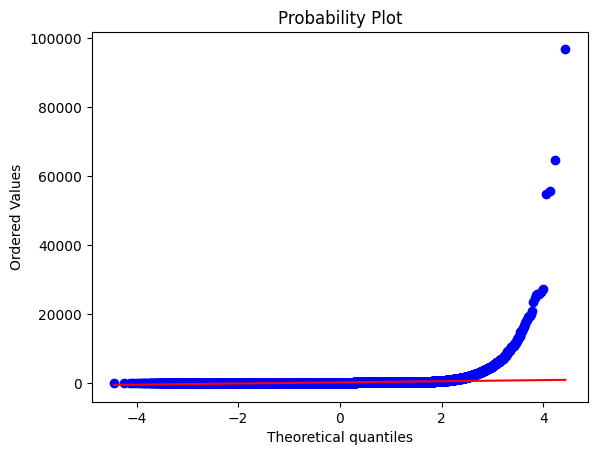

In [66]:
# total_rtt
sns.distplot(df1['total_rtt'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['total_rtt'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['total_rtt'], plot=plt)
plt.show()

Note:-Right tailed too.


 mu = 21569572.94 and sigma = 118438811.90



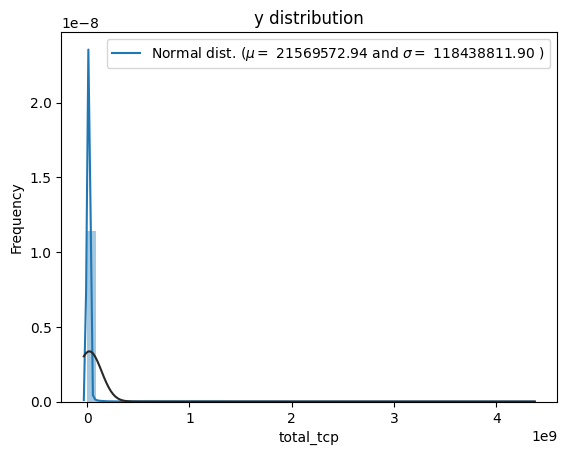

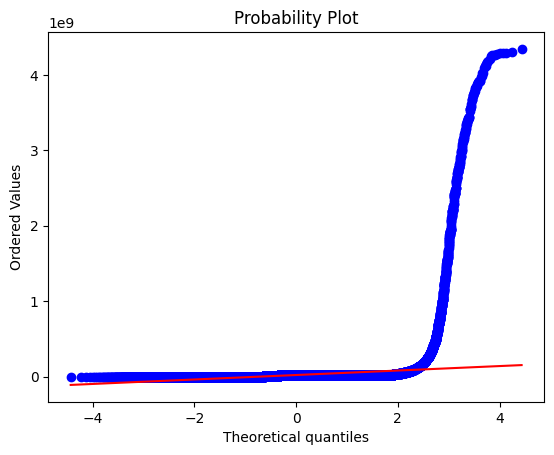

In [67]:
# total_tcp
sns.distplot(df1['total_tcp'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['total_tcp'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['total_tcp'], plot=plt)
plt.show()

Bivariate Analysis

– explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings.

(Social Media, Google, Email, YouTube, Netflix, Gaming ++ total_bytes).

In [68]:
# data['total'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
# sns.barplot(x = data['social_media'], y = data['total'])

biv_data = df1[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'total_bytes', 'other']]
# adding a summation row in all columns
biv_data.loc['totals'] = biv_data.sum()
biv_data.tail()

,social_media,google,email,youtube,netflix,gaming,total_bytes,other
149997,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.057839e+08,7.146381e+08
149998,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,6.276986e+08,1.324156e+08
149999,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,4.015220e+08,8.161200e+08
150000,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.957646e+08,4.293653e+08
totals,2.742394e+11,1.171102e+12,3.388676e+11,3.396545e+12,3.394314e+12,6.455040e+13,7.436519e+13,6.440523e+13


Applications total bytes

Text(0.5, 0, 'application')

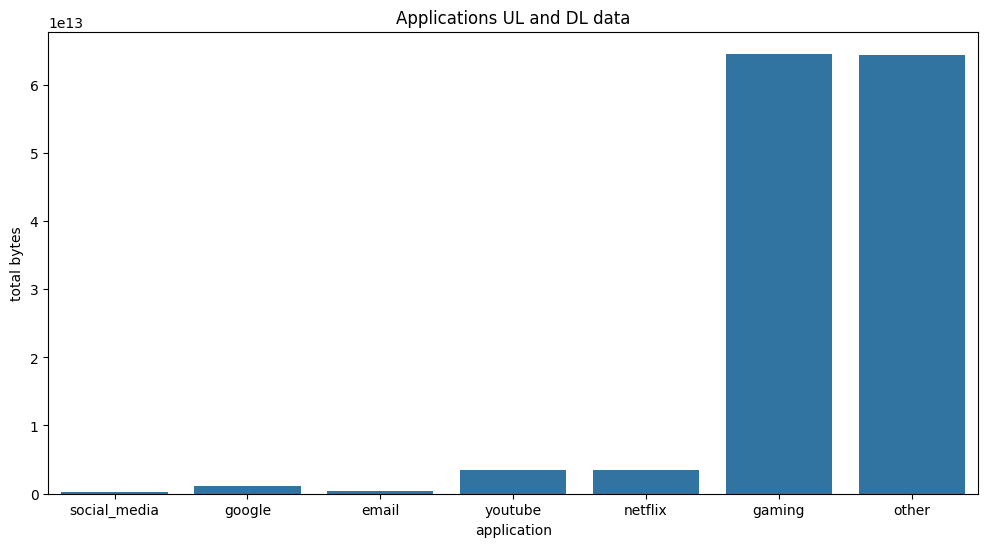

In [69]:
a = biv_data.tail(1)
long_df = pd.melt(a)
long_df = long_df.drop([6], axis  = 0)
plt.figure(figsize=(12,6))
sns.barplot(x = long_df.variable, y = long_df.value)
plt.title('Applications UL and DL data')
plt.ylabel('total bytes')
plt.xlabel('application')

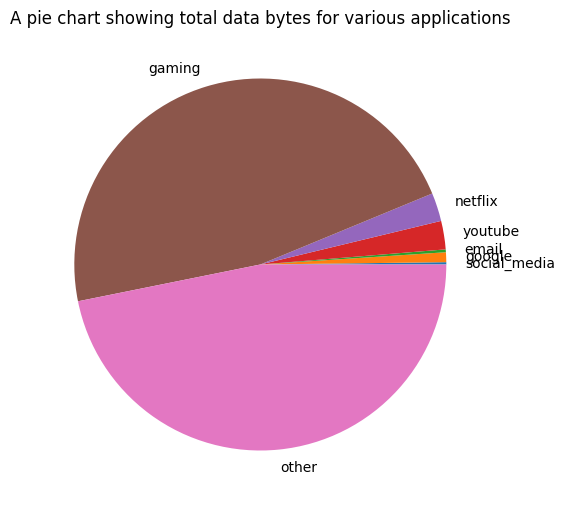

In [70]:
fig = plt.figure(figsize =(6, 7)) 
a = biv_data.drop(['total_bytes'], axis = 1)
plt.pie(a.loc['totals'], labels = a.columns)
plt.title('A pie chart showing total data bytes for various applications')
plt.show()

Note:-Will you look at that!!! Gamers Republic!!

. The large percentage of others can be explained by many applications under the name others.

.  As for gaming:

1 .The applications are heavy. (Require more data)

2 .Most of the users are gamers.

3 .Most of the applications in the hand sets are games.

One on one plots on the apps vs total_bytes

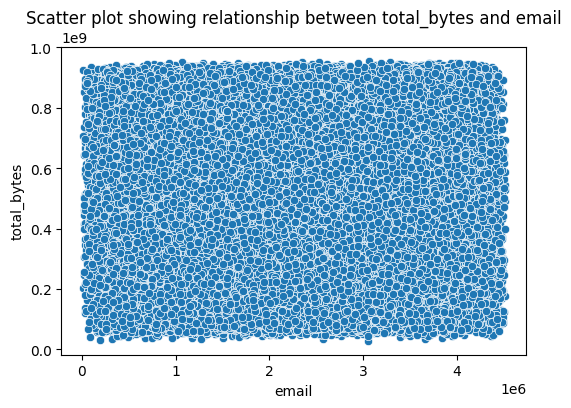

In [71]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = df1, x='email', y='total_bytes')
plt.title('Scatter plot showing relationship between total_bytes and email')
plt.show()

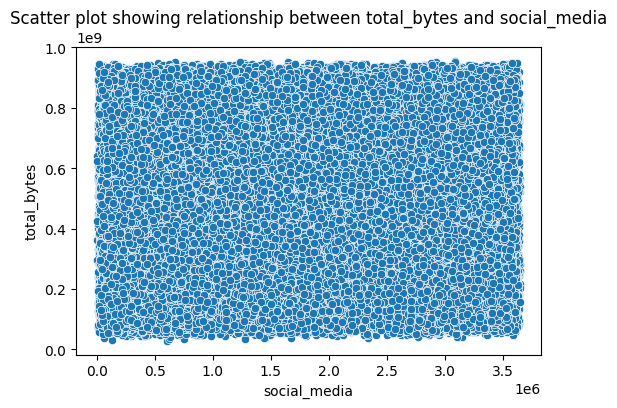

In [72]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = df1, x='social_media', y='total_bytes')
plt.title('Scatter plot showing relationship between total_bytes and social_media')
plt.show()

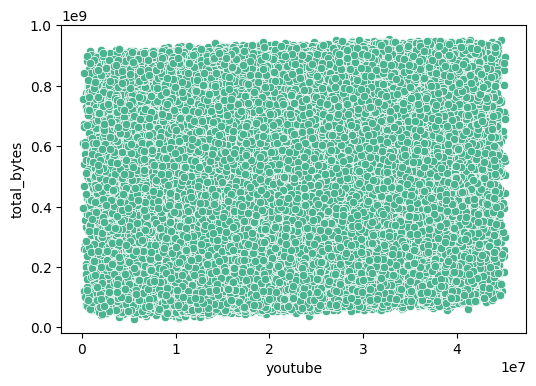

In [73]:
plt.figure(figsize=(6, 4))
# sns.jointplot(data = data, x='youtube', y='total_bytes', kind = 'hex', color = '#4CB391')
sns.scatterplot(data = df1, x='youtube', y='total_bytes', color = '#4CB391')
# plt.title('Hexplot plot showing relationship between total_bytes and youtube')
plt.show()

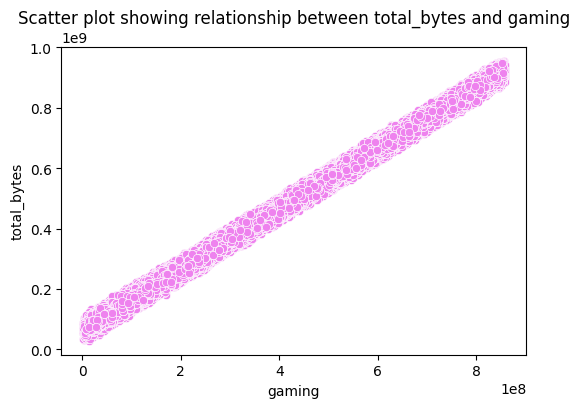

In [74]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = df1, x='gaming', y='total_bytes', color = 'violet')
plt.title('Scatter plot showing relationship between total_bytes and gaming')
plt.show()

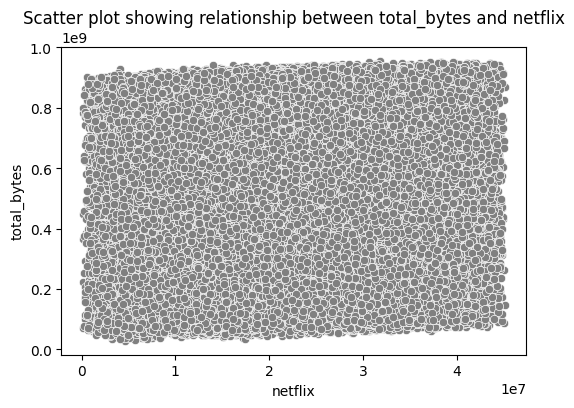

In [75]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data = df1, x='netflix', y='total_bytes', color = 'grey')
plt.title('Scatter plot showing relationship between total_bytes and netflix')
plt.show()

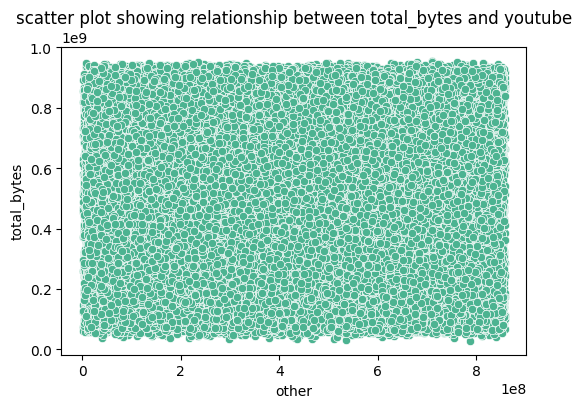

In [76]:
plt.figure(figsize=(6, 4))
# sns.jointplot(data = data, x='other', y='total_bytes', kind = 'hex', color = '#4CB391')
sns.scatterplot(data = df1, x='other', y='total_bytes', color = '#4CB391')
plt.title('scatter plot showing relationship between total_bytes and youtube')
plt.show()

### Variable transformations

– segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

In [77]:
# adding Decile_rank column to the DataFrame 
df1['Decile_rank'] = pd.qcut(df1['Dur. (ms).1'], 5, labels = False) 
# df1.columns

In [78]:
new_df = df1[['Decile_rank', 'total_bytes']]
a = new_df.groupby('Decile_rank').sum()
a

,total_bytes
Decile_rank,
0,1.488404e+13
1,1.492541e+13
2,1.478282e+13
3,1.485458e+13
4,1.491834e+13


Text(0.5, 0, 'decile rank')

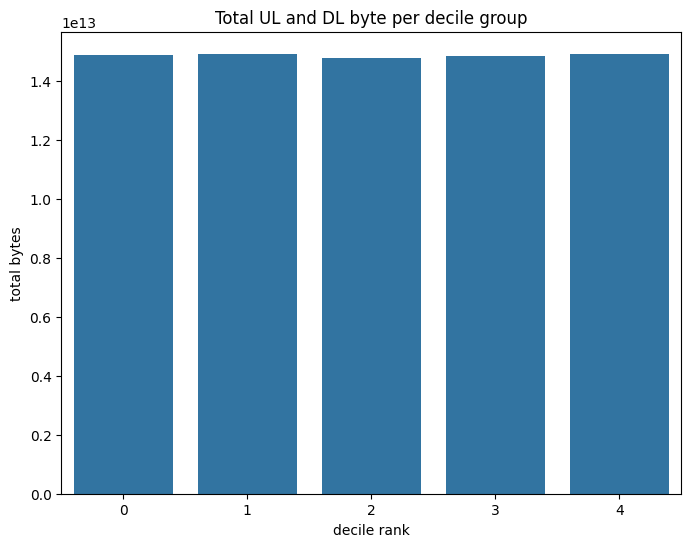

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(x = a.index, y = a.total_bytes)
plt.title('Total UL and DL byte per decile group')
plt.ylabel('total bytes')
plt.xlabel('decile rank')

### Correlation Analysis

– compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data - (jupyter notebook + slide )

correlation on the total bytes

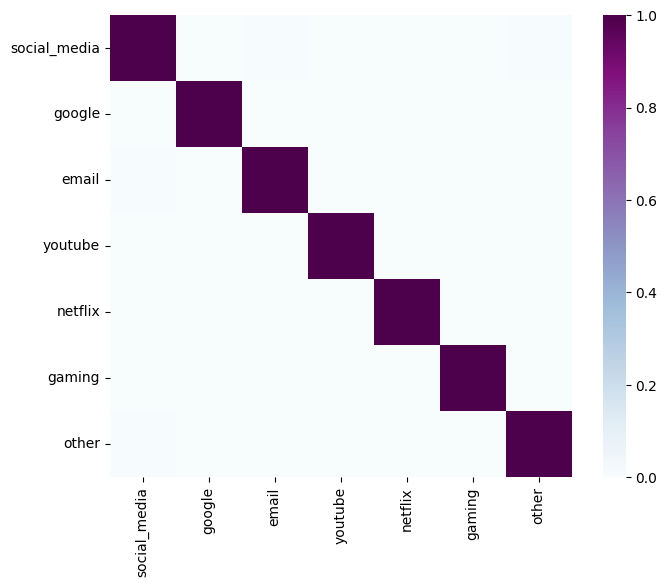

In [80]:
corr_data = df1[['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']]

    
corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

Note:-The correlation between the variables is super low.

### On the upload bytes

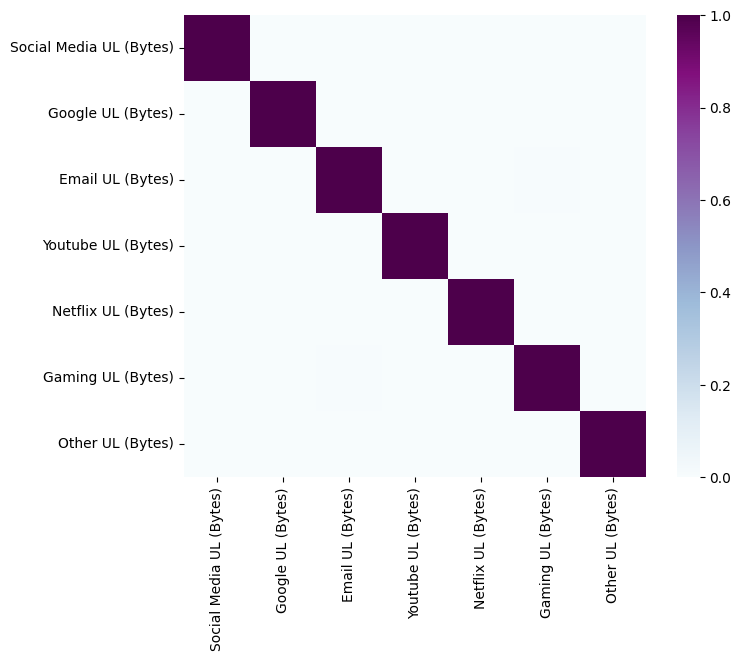

In [81]:
corr_data = df1[['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']]

    
corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

Note:-The correlation between the variables is super low.

### On the download bytes

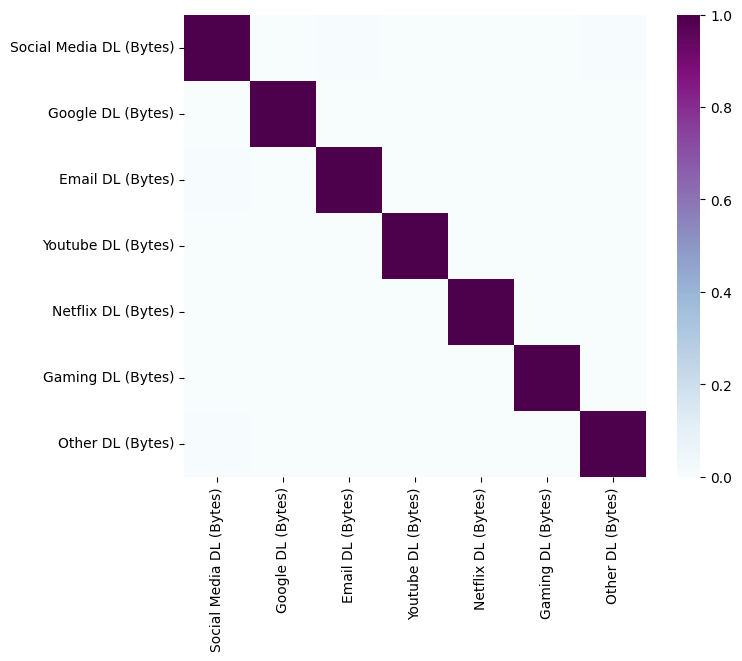

In [82]:
corr_data = df1[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]

    
corr = corr_data.corr()
f_fig, f_ax = plt.subplots(figsize=(8, 6))
f_ax = sns.heatmap(corr, vmin=0, vmax=1, square=True,
                   annot=False, annot_kws={"size": 10}, cmap="BuPu")

Note:- The correlation between the variables is super low.

### Dimensionality Reduction

– perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results.

In [83]:
# standardize the data
from sklearn.preprocessing import StandardScaler


new_numerical = [] #this leaves out the categorical columns that were encoded but not replaced
for col in df1.columns:
    if df1[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        new_numerical.append(col)
        
seg = df1[new_numerical].copy()
seg = seg.drop(['MSISDN/Number'], axis = 1) #drop the id col
scaler = StandardScaler()
scaled_data = scaler.fit_transform(seg)

In [84]:
scaled_data.shape

(150001, 61)

In [85]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [86]:
pca.explained_variance_ratio_

array([1.32330708e-01, 8.19501212e-02, 5.33987425e-02, 4.71969698e-02,
       4.17744898e-02, 3.57788276e-02, 3.33930093e-02, 3.30774526e-02,
       3.28867963e-02, 3.27786951e-02, 3.25874806e-02, 3.23444998e-02,
       2.97563153e-02, 2.73088954e-02, 2.44931953e-02, 2.38809088e-02,
       2.28821124e-02, 1.83803780e-02, 1.65907911e-02, 1.65322980e-02,
       1.64808868e-02, 1.64040982e-02, 1.63725198e-02, 1.63537626e-02,
       1.62704567e-02, 1.62282038e-02, 1.59312149e-02, 1.49936833e-02,
       1.43955939e-02, 1.27547512e-02, 1.20302554e-02, 1.02242198e-02,
       8.76206026e-03, 7.99311463e-03, 6.94617916e-03, 6.18377772e-03,
       4.97509459e-03, 4.72652504e-03, 4.49627108e-03, 2.89766606e-03,
       2.54091657e-03, 1.32432324e-03, 1.04483249e-03, 2.68446662e-04,
       6.36374857e-05, 1.48216629e-05, 1.22841695e-13, 2.63958189e-31,
       1.02946493e-31, 8.31615933e-32, 3.92725620e-32, 2.68468150e-32,
       1.78479172e-32, 1.28981296e-32, 1.15954201e-32, 8.50530283e-33,
      

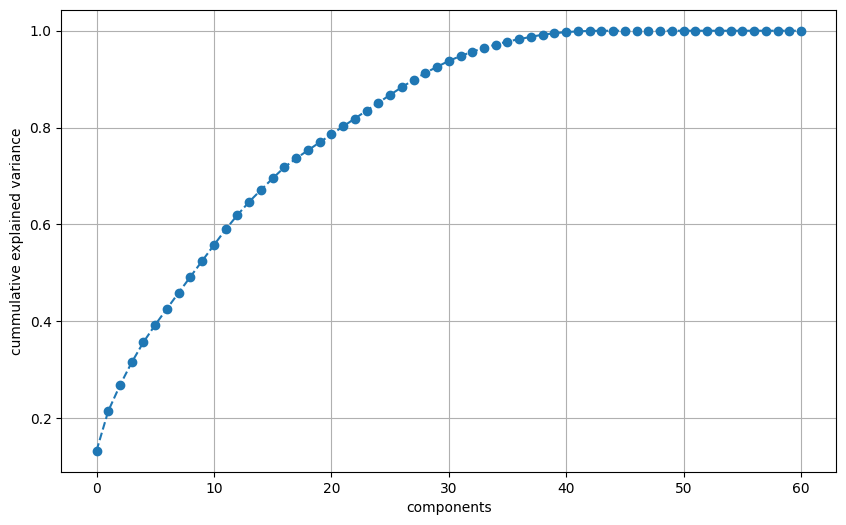

In [87]:
plt.figure(figsize = (10,6))
plt.plot(range(61), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')
plt.grid(True)

Note:-When choosing the number of components, the number cutting at least 80% of the cumm explained variance is considered. n = 23

In [88]:
pca = PCA(n_components = 23)
pca.fit(scaled_data)

PCA(n_components=23)

In [89]:
pca_scores = pca.transform(scaled_data)
pca_scores

array([[-4.23196634e+00,  1.39855914e+00,  1.65640317e+01, ...,
         4.61471727e-01,  7.91268471e-01, -1.79341554e-01],
       [-3.44471343e+00, -1.87180880e+00,  1.23264348e+01, ...,
         1.72323182e-01, -1.27767439e+00,  4.79659607e-01],
       [-3.45373762e+00,  1.74254232e+00,  1.23508552e+01, ...,
         2.77511103e-02, -2.19174712e-01,  1.51839079e-01],
       ...,
       [-1.41224722e+00, -1.19976906e+00,  6.68768780e-01, ...,
         3.77124264e-01, -5.61927539e-01, -4.26345126e-01],
       [-1.00623495e+00,  8.47608641e-01,  6.45465647e-01, ...,
        -3.92351156e-01,  3.10744999e-01, -1.90108251e+00],
       [-4.80022941e-02,  4.15716850e-04,  2.58640698e-01, ...,
         8.18347583e-03,  4.14206340e-03,  1.49860293e-03]])

In [90]:
# new_data_df = pd.concat([seg.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
# c.columns.values[-2:] = ['component1', 'component2']
# new_data_df.head() #contains the original cols 

a = pd.DataFrame(pca_scores)
a['MSISDN/Number'] = df1['MSISDN/Number']
a.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,MSISDN/Number
0,-4.231966,1.398559,16.564032,-8.648209,0.384191,-13.030535,-1.444046,0.679518,1.389545,1.222192,...,1.458724,-0.583472,-0.301375,-0.968471,-0.104185,0.055335,0.461472,0.791268,-0.179342,3.366496e+10
1,-3.444713,-1.871809,12.326435,-6.415392,-3.442295,-9.411475,0.312927,-0.319829,-1.470203,2.035750,...,0.927212,1.281554,-0.276314,0.331689,-1.081445,1.403556,0.172323,-1.277674,0.479660,3.368185e+10
2,-3.453738,1.742542,12.350855,-6.388336,-0.409998,-9.486490,0.200319,0.113089,0.514296,-1.394199,...,0.808985,2.709809,-0.361901,0.879821,-0.426691,-0.095045,0.027751,-0.219175,0.151839,3.376063e+10
3,-3.426915,-3.552346,12.005735,-6.243593,-0.979192,-9.151362,1.580795,-0.280963,-2.324476,-1.895801,...,0.990474,0.390748,-0.244011,0.794992,0.438128,-0.418517,0.157791,-0.483041,0.751533,3.375034e+10
4,-3.023696,-0.974888,9.889442,-5.090518,-0.561013,-7.417245,0.843344,-0.008539,-1.548744,-0.314367,...,0.678315,0.828149,-0.191765,-1.333107,-1.629615,-0.100701,-1.151147,-0.049698,1.682258,3.369980e+10


<Axes: xlabel='0', ylabel='1'>

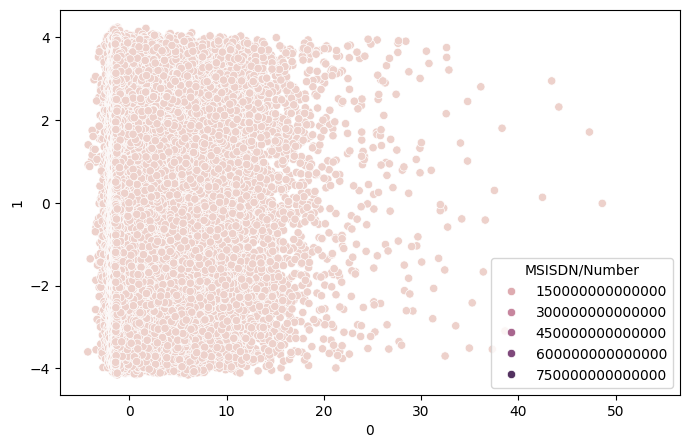

In [91]:
#plotting the first 2 components since they explain most of the variability.
plt.figure(figsize=(8,5))
sns.scatterplot(x= a[0], y = a[1], hue = a['MSISDN/Number'])

[Back to top](#Table-of-Contents)